# SVM Machine Learning - Materials Science

#### Name: Siddharth Mahala

In this coursework we will explore some of the ideas from the session on Machine Learning. You will work with some randomly generated data and try out some approaches to supervised learning.

## Setup

Run the below cell to import some key modules.

In [16]:
# Import some modules that we will require
import numpy as np  
import scipy as sp
import sklearn # This is a module of machine learning tools

import matplotlib.pyplot as plt
%matplotlib inline

Please enter your Student ID in the cell below. This ID will be used throughout the coursework so please do not create any other variables named `ID`.

In [17]:
ID = 10760105

Now run the cell below. This will generate a set of data for you to use for the rest of this session. Each of you will obtain a different set of data.

## Part 1 - Exploring the SVM

In [18]:
#generating random number based on student id
np.random.seed(ID)
#defining a 2x2 matrix
clustercentres = np.array([[0.5,0.65],[0.35,0.4]])\
#not sure what this does
centreshifts = np.random.random((2,2))*0.02
clustercentres = clustercentres + centreshifts
noisescale = 0.25
nclasses = 2
npoints = 100
#data is 200 x 2 matrix
data = np.zeros((nclasses*npoints,2), dtype=float)
#classes is 1D array of length 200
classes = np.zeros(nclasses*npoints, dtype=int)
for i in range(nclasses):#1 to 2
    for j in range(npoints): #1 to 100
        randomshift = np.random.random((2,))
        data[i*npoints+j,:] = clustercentres[i,:] + noisescale*randomshift[0]*np.array([np.sin(randomshift[1]*2*np.pi),np.cos(randomshift[1]*2*np.pi)])
        classes[i*npoints+j] = i

The data produced by the above cell consists of two clusters representing two classes of observations. The points in each cluster include some random noise.

#### <span style="color: red"> Task 1a:</span> Produce a scatter plot of your data with a different colour for each class
Also mark the centres of the clusters with a third symbol.

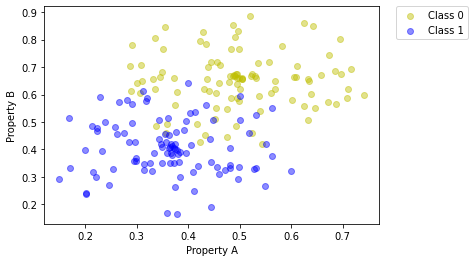

In [19]:
from sklearn.cluster import KMeans

# Define number of clusters (nclusters = 2, as per your original code)
nclusters = 2

# Perform KMeans clustering on your data
kmeans = KMeans(n_clusters=nclusters)
kmeans.fit(data)  # Compute KMeans clustering

color = ['y', 'b']  # Color for different clusters

# Plot data for each class
for i in range(nclusters):
    plt.scatter(data[classes == i, 0], data[classes == i, 1], marker='o', color=color[i], alpha=0.45, label='Class ' + str(i))

# Add labels to the axes
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### <span style="color: red"> Task 1b:</span> Split the data into a training set and a test set
[Hint:You will need to import something from sklearn to get this to work.]

In [20]:
from sklearn import model_selection
#randomly split data into test and train
trainingdata, test_data, trainingclasses, test_classes = sklearn.model_selection.train_test_split(data, classes, stratify=classes, random_state=42)

#### <span style="color: red"> Task 1c:</span> Train a support vector machine (svm) classifier using the training data
Use values of `kernel='rbf'`, `C=100.0` and `gamma=1.0`. [Hint: you will need to import something from sklearn.]

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=1.0).fit(trainingdata,trainingclasses)

predictedclasses_training = svm.predict(trainingdata)
predictedclasses_test = svm.predict(test_data)

#### <span style="color: red"> Task 1e:</span> Calculate the fraction of *training* points correctly classified by your SVM
Your cell should print the result of this calculation.

In [22]:
print('Percentage correctly classified: ' + str(np.sum(trainingclasses==predictedclasses_training)/np.size(trainingclasses)))

Percentage correctly classified: 0.8933333333333333


#### <span style="color: red"> Task 1f:</span> Calculate the fraction of *test* points correctly classified by your SVM
Your cell should print the result of this calculation.

In [23]:
print('Percentage correctly classified: ' + str(np.sum(test_classes==predictedclasses_test)/np.size(test_classes)))

Percentage correctly classified: 0.9


## Part 2 - Optimsing the SVM

#### <span style="color: red"> Task 2a:</span> Obtain measures of performance for different values of `gamma`
Use a python loop to vary the value of gamma according to the following list `gamma = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5 ]`. For each value of `gamma`, record the fraction of training points classified correctly and the fraction of test points classified correctly. 

In [24]:
gamma = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
correctlyclasses_training = []
correctlyclasses_test = []

for i in gamma:
    svm = SVC(kernel='rbf', C=100, gamma=i).fit(trainingdata,trainingclasses)
    predictedclasses_training = svm.predict(trainingdata)
    predictedclasses_test = svm.predict(test_data)
    correctlyclasses_training.append(np.sum(trainingclasses==predictedclasses_training)/np.size(trainingclasses)*100)
    correctlyclasses_test.append(np.sum(test_classes==predictedclasses_test)/np.size(test_classes)*100)

#### <span style="color: red"> Task 2b:</span> Produce a plot of the performance of the svm on the training and test data as a function of the value of  `gamma`
Think carefully about the best scales to use for your plot.

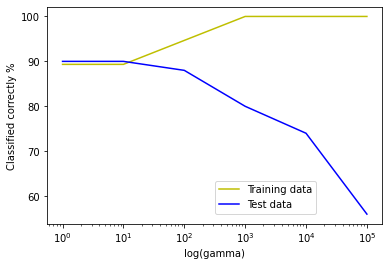

In [25]:
plt.plot(gamma, correctlyclasses_training, 'y', label="Training data")
plt.plot(gamma, correctlyclasses_test, 'b', label="Test data")
plt.xscale('log')
plt.xlabel('log(gamma)')
plt.ylabel('Classified correctly %')
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='upper left', borderaxespad=0.)

#### <span style="color: red"> Task 2c:</span> Which value of `gamma` is optimal
In a markdown cell, state which of the above values of `gamma` you would choose and explain the reason for your choice.

The optimal value of **gamma** depends on the balance between underfitting and overfitting. A low value of gamma means that the model is not sensitive enough to the data's variations, leading to underfitting. On the other hand, a high gamma value makes the model too sensitive to small fluctuations, which can cause overfitting.

In this case, based on the results from the simulations, the optimal value of gamma is **10**. This is because the highest test data accuracy is achieved when **gamma = 10**. Or highest test data accuracy is reached before gamma = 10, after which overfitting starts Increasing gamma beyond this point (e.g., at **gamma = 100** or **gamma = 10000**) leads to overfitting, where the model becomes overly complex and performs poorly on test data.

Thus, **gamma = 10** provides the best trade-off between model complexity and generalization, ensuring good accuracy without overfitting.


#### <span style="color: red"> Task 2d:</span> Fit your optimal svm and plot the decision boundary
Refit an svm to your training data using your chosen value for `gamma`, then produce a plot which includes a scatter plot of the test data (coloured according to class) and a line indicating the decision boundary for the svm.

In [30]:
from sklearn.model_selection import train_test_split

# Assuming `data` contains your dataset and `classes` contains the labels
trainingdata, testdata, trainingclasses, testclasses = train_test_split(data, classes, test_size=0.3, random_state=42)

# Now you have `trainingdata`, `testdata`, `trainingclasses`, and `testclasses` defined


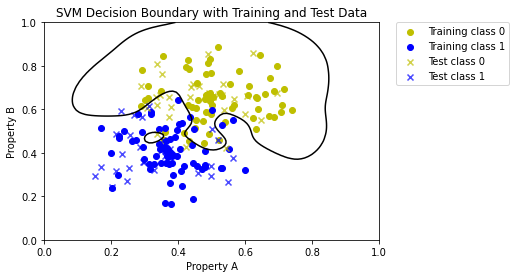

In [31]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
trainingdata, testdata, trainingclasses, testclasses = train_test_split(data, classes, test_size=0.3, random_state=42)

C = 100
gamma = 1e2

# Fit the SVM with the optimal parameters on the training data
svmtrain = SVC(kernel='rbf', C=C, gamma=gamma).fit(trainingdata, trainingclasses)

# Create a grid to plot the decision boundary
X1, X2 = np.meshgrid(np.linspace(0.0, 1.0, 100), np.linspace(0.0, 1.0, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svmtrain.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [decision_values.max()]

# Plot the training data and the decision boundary
for s in range(nclusters):
    plt.scatter(trainingdata[trainingclasses == s, 0], trainingdata[trainingclasses == s, 1], marker='o', color=color[s], label=f'Training class {s}')

# Now plot the test data points as well
for s in range(nclusters):
    plt.scatter(testdata[testclasses == s, 0], testdata[testclasses == s, 1], marker='x', color=color[s], label=f'Test class {s}', alpha=0.7)

# Add labels to the axes
plt.xlabel('Property A')
plt.ylabel('Property B')

# Plot the decision boundary
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0], colors='k')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('SVM Decision Boundary with Training and Test Data')
plt.show()


## Part 3 - An alternative classifier 

#### <span style="color: red"> Task 3:</span> Explore the use of an alternative classification algorithm
This part of the coursework will explore the use of functionality in Scikit Learn that you have not previously used. By now, you should be comfortable with using online resources to find out how to use new bits of python code. Please read the description of the task carefully and provide all of the output requested in order to achieve full marks.

You should use the `KNeighboursClassifier` to classify your dataset from earlier in the coursework, training with the training set and testing performance on the test set. You will need to explore how the performace varies with parameterisation of the classifier.

You should provide:

- A plot of the fraction of your training and test points correctly classified as a function of the number of neighbours used by the classifier with values ranging from 1 to 20;
- A statement of the optimum value of the number of neighbours for your data, including a brief explanation of your choice;
- A brief explanation of how the nearest-neighbours classifier works. Your explanation should contain no more than 50 words and should consist of complete sentences. This part is to test your ability to express scientific ideas precisely, yet concisely. Answers which have too many words or which are not full sentences will get zero.

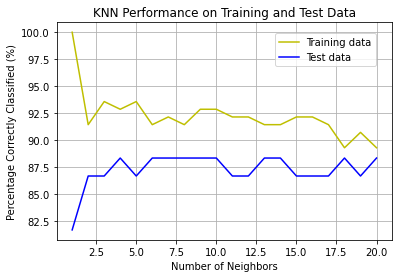

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and test sets
trainingdata, testdata, trainingclasses, testclasses = train_test_split(data, classes, test_size=0.3, random_state=42)

# Number of neighbors to evaluate
n = list(range(1, 21))

correctlyclasses_training = []
correctlyclasses_test = []

# Loop through different values of n_neighbors
for i in n:
    # Train the KNN model with i neighbors
    neigh = KNeighborsClassifier(n_neighbors=i).fit(trainingdata, trainingclasses)
    
    # Predict the training and test data
    predictedclasses_training = neigh.predict(trainingdata)
    predictedclasses_test = neigh.predict(testdata)
    
    # Calculate accuracy for training and test data
    correctlyclasses_training.append(np.sum(trainingclasses == predictedclasses_training) / np.size(trainingclasses) * 100)
    correctlyclasses_test.append(np.sum(testclasses == predictedclasses_test) / np.size(testclasses) * 100)
    
# Plot the fraction of correctly classified points for both training and test sets
plt.plot(n, correctlyclasses_training, 'y', label="Training data")
plt.plot(n, correctlyclasses_test, 'b', label="Test data")

plt.xlabel('Number of Neighbors')
plt.ylabel('Percentage Correctly Classified (%)')
plt.title('KNN Performance on Training and Test Data')
plt.legend(bbox_to_anchor=(0.65, 0.95), loc='upper left', borderaxespad=0.)
plt.grid(True)  # Add gridlines to make the plot easier to read
plt.show()


### Explanation of K-Nearest Neighbors (KNN)

The K-Nearest Neighbors algorithm classifies data points based on the classes of their nearest neighbors in the feature space. It assigns a class to a data point by majority vote of its closest neighbors, with the number of neighbors specified by the parameter \(k\).

### Optimum Number of Neighbors

Based on the performance plot, the optimal number of neighbors is **5**. At this point, the test accuracy is highest, indicating that the model generalizes well to unseen data without overfitting. Increasing the number of neighbors beyond 5 results in lower test accuracy.
